In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

In [57]:
# Combine the data into a single dataset
mergedMice = pd.merge(mouse_df, study_df, on ="Mouse ID", how = "inner")


# Display the data table for preview
mergedMice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleanMice = mergedMice.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleanMice.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice in the clean DataFrame.
cleanMice["Mouse ID"].count()

1888

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

groupedMice = cleanMice.groupby(["Drug Regimen"])
meanMice = groupedMice["Tumor Volume (mm3)"].mean()
medianMice = groupedMice["Tumor Volume (mm3)"].median()
varianceMice = groupedMice["Tumor Volume (mm3)"].var()
stdMice = groupedMice["Tumor Volume (mm3)"].std()
semMice = groupedMice["Tumor Volume (mm3)"].sem()



In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
groupedMice = cleanMice.groupby(["Drug Regimen"])
aggMice = groupedMice["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

aggMice

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:xlabel='Drug Regimen'>

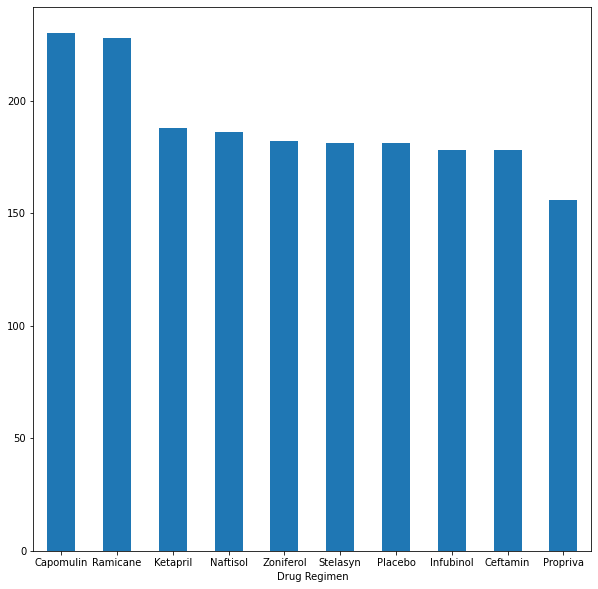

In [62]:


# Generate a bar plot showing the total number of 
#unique mice tested on each drug regimen using pandas.

totalMice = groupedMice["Mouse ID"].count()
totalMice = totalMice.sort_values(ascending = False)
totalMiceBar = totalMice.plot.bar(x="Drug", y ="Number of Mice", rot = 0,figsize=(10,10))
totalMiceBar



<AxesSubplot:ylabel='Sex'>

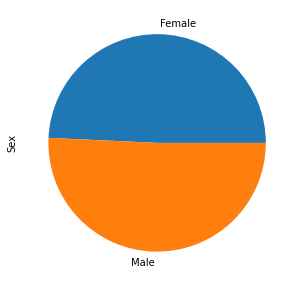

In [63]:
genderMice = cleanMice.groupby(["Sex"])
genderMice = genderMice["Mouse ID"].count()
genderMice = genderMice.rename("Sex")

totalMicePie = genderMice.plot.pie(y = "Sex", figsize=(5,5))
totalMicePie

In [64]:
cleanMiceMax = cleanMice.groupby(['Mouse ID']).max()['Timepoint']
cleanMiceMax = cleanMiceMax.reset_index()
allLastMice = cleanMiceMax.merge(cleanMice, on=["Mouse ID","Timepoint"], how = "left")

capDrugsRaw = allLastMice.loc[allLastMice["Drug Regimen"]=="Capomulin", :]
ramDrugsRaw = allLastMice.loc[allLastMice["Drug Regimen"]=="Ramicane", :]
infDrugsRaw = allLastMice.loc[allLastMice["Drug Regimen"]=="Infubinol", :]
cefDrugsRaw = allLastMice.loc[allLastMice["Drug Regimen"]=="Ceftamin", :]

In [65]:
volumeData=[]
drugList = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for drug in drugList:
    
    finalTumorData=allLastMice.loc[allLastMice['Drug Regimen']== drug,'Tumor Volume (mm3)']

    volumeData.append(finalTumorData)
    
    quartiles = finalTumorData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    outlier=finalTumorData.loc[(finalTumorData<lowerBound)|(finalTumorData>upperBound)]
    print(outlier)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


<ipython-input-66-8b63d5e5d159>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])


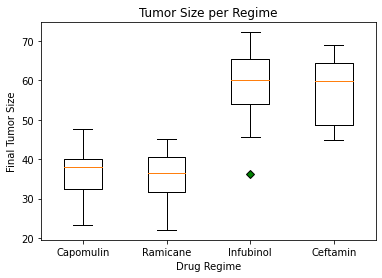

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Size per Regime")
ax1.set_ylabel("Final Tumor Size")
ax1.set_xlabel("Drug Regime")
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
green_diamond = dict(markerfacecolor='g', marker='D')

plt.show(ax1.boxplot([capDrugsRaw["Tumor Volume (mm3)"],ramDrugsRaw["Tumor Volume (mm3)"], \
    infDrugsRaw["Tumor Volume (mm3)"],cefDrugsRaw["Tumor Volume (mm3)"]], flierprops=green_diamond))

In [67]:
capDrugsOnly = cleanMice.loc[cleanMice["Drug Regimen"]=="Capomulin", :]

capDrugsOneMouse=capDrugsOnly.iloc[:10]
capDrugsOneMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Tumor Volume over Time')

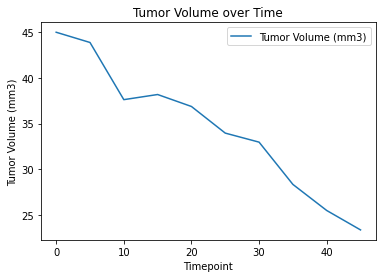

In [68]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


ax2 = capDrugsOneMouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_title("Tumor Volume over Time")

Text(0.5, 1.0, 'Weight vs Tumor Volume')

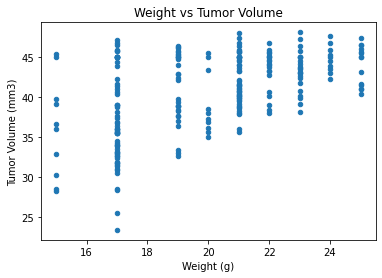

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ax3 = capDrugsOnly.plot.scatter(x ="Weight (g)" ,y="Tumor Volume (mm3)")
ax3.set_title("Weight vs Tumor Volume")

Text(20, 25, 'y = 0.96x +21.49')

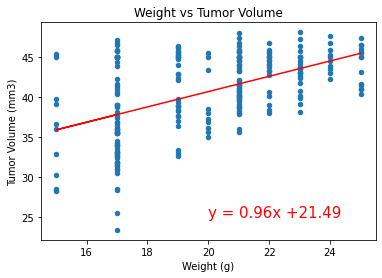

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ax4 = capDrugsOnly.plot.scatter(x ="Weight (g)" ,y="Tumor Volume (mm3)")
ax4.set_title("Weight vs Tumor Volume")
x_values=capDrugsOnly["Weight (g)"]
y_values = capDrugsOnly["Tumor Volume (mm3)"]

#regression input
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")